## 1. Linear regression and diagnostics: 선형회귀와 진단

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston   #sklearn에서 제공하는 보스턴 데이터 가져옴
from sklearn import metrics
%matplotlib inline

### 1.1. Load the 'Boston' dataset from Scikit-Learn: 
#### Scikit-Learn에서 'Boston'데이터 셋로드: 보스턴 인근의 구역별 집 값

In [2]:
data = load_boston()  #딕셔너리

In [3]:
#딕셔너리 키 보기
data.keys()  

#data: x변수(설명변수) 
#target: y변수
#feature_names: x변수의 이름들(data 열의 이름들)
#DESCR: 데이터에 대한 설명

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
#데이터 description 
print(data['DESCR']) 

#13개 변수(crim,zn,indus~)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#설명변수
X = data['data']
header = data['feature_names']
header #변수 이름들

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
#반응변수
Y = data['target']
Y = Y.reshape(-1, 1)
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

### 1.2. Convert the data into a DataFrame and then explore: 데이터를 DataFrame으로 변환한 다음 탐색

In [7]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']       #price는 y

In [8]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [10]:
#변수(열)의 기술통계량
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#상관계수 행렬 만듬
np.round(df.corr(),2)    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


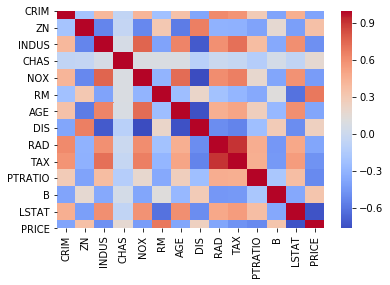

In [12]:
#상관행렬을 heatmap으로 시각화
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

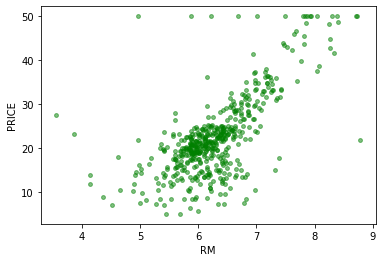

In [13]:
# RM과 PRICE를 시각화
plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

# RM이 증가할수록 PRICE증가

### 1.3. Train by linear regression: 선형회귀에 의한 훈련

In [14]:
#학습
lm = LinearRegression(fit_intercept=True)  #절편 포함여부: fit_intercept=True(디폴트 값)
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#베타0 값
lm.intercept_   

array([36.45948839])

In [16]:
#베타1부터 나머지 값
lm.coef_  

#lm.coef[0]
#lm.codf[0][1]해야 두번째 꺼 나옴
#여긴선 나머지 값도 보려 함 

#array를 두겹으로 인덱싱해야 한다

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [17]:
#데이터프레임으로 표시
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF

#CRIM 앞에 붙는 파라미터 값은 -0.108

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


### 1.4. Diagnostics: 진단

In [18]:
# In-sample prediction.
predY = lm.predict(X)

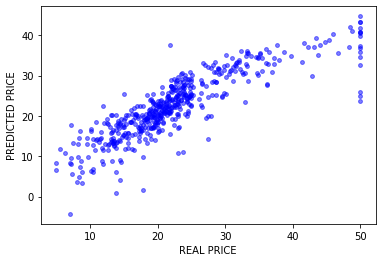

In [19]:
# Display real Y vs predicted Y.
plt.scatter(Y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

#일직선에서 조금 벗어난듯

In [20]:
#Calculate the correlation between the real Y and predicted Y.
pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

#상관계수가 낮지는 않지만 최고는아님

0.8606059865637752

In [21]:
#결정계수 R^2(1에 가까울수록 좋음)
lm.score(X,Y)

0.7406426641094095

### 5) In-sample and out-of-sample testing:

In [22]:
#x,y변수를 in-sample, out-sample로 쪼갬 (train을 7, test를 3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#x는 354,152, y는 13,1

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [23]:
# predY_in = in-sample prediction of Y.
# predY_out = out-of-sample prediction of Y.  
lm = LinearRegression()
lm.fit(X_train,Y_train) 

predY_in = lm.predict(X_train)  #학습데이터 가지고 예측
predY_out = lm.predict(X_test)  #테스트데이터 가지고 예측

In [24]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, predY_in)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, predY_out)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))

#항상 in이 out보다 작다는것을 알 수 있음: 따라서 in만 하면 out보다 좋게 나오는데 이게 착시효과일수도

#in과 out의 차이가 적어야 out의 결과가 좋은 것, 차이가 크면 오버피팅

In-sample MSE is      : 20.184336639873155
Out-of-sample MSE is  : 28.40585481050824
--------------------------------------------------
In-sample RMSE is     : 4.492698146979514
Out-of-sample RMSE is : 5.329714327288869


NOTE: In-sample error are a bit smaller but not by much.(in-sample 오류가 작지만 크지도 않다)

### 1.6. Residual analysis: 잔차분석

In [25]:
# 잔차계산
residual = Y_train - predY_in  #in-sample 잔차분석

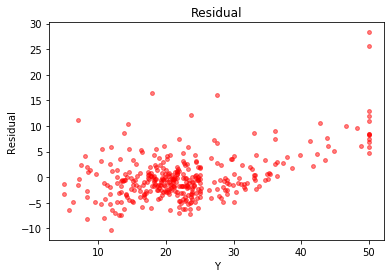

In [26]:
# Q: Can you check "visually" that the mean = 0 and variance = constant?
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

#y에 따라 평균이 0이고 표준편차가 일정한지 봄
#평균이 0에대해 분포 되있기 보단 한쪽으로 쏠리고 약간 올라감


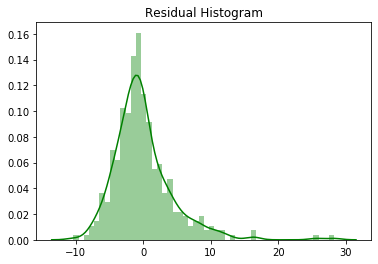

In [27]:
# Q: Are the residuals normally distributed centered around 0?
sns.distplot(residual, bins=50, color='green').set_title("Residual Histogram")
plt.show()

#잔차를 히스토그램하니 한쪽으로 쏠림

### 1.7. Given a new set of values for the explanatory variables, predict the response:  
#### 새로운 x프라임 값이 주어질 때, 반응변수 값을 예측하라
- CRIM     : 0.03
- ZN       : 0.0
- INDUS    : 13.0
- CHAS     : 0.0
- NOX      : 0.4
- RM       : 4.3
- AGE      : 23.5
- DIS      : 1.9
- RAD      : 1.0
- TAX      : 273.0
- PTRATIO  : 18.0 
- B        : 380.0
- LSTAT    : 7.5

In [28]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  #array하고 reshape
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))  #예측된 y값을 array해서 [0,00하고 소수점 세자리

#새로운 x프라임 값이 주어지면 집값은 2만 6천불일 것이다라고 예측

20.594
